In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from multi_mems import *

/home/hendrykn123/.local/lib/python3.9/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.2' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/hendrykn123/.local/lib/python3.9/site-packages/pandas/core/arrays/masked.py:64: UserWarning: Pandas requires version '1.3.2' or newer of 'bottleneck' (version '1.2.1' currently installed).
  from pandas.core import (


### Load Example Trajectories

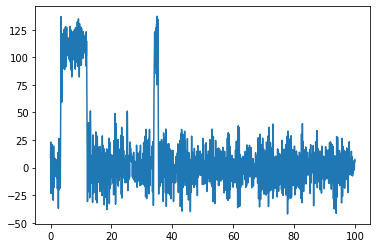

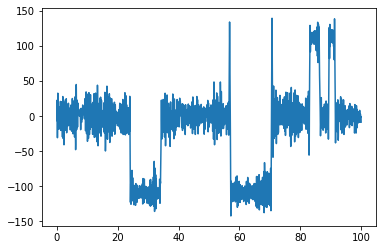

In [2]:
theta = np.load('theta.npy')
phi = np.load('phi.npy')
dt = 0.002

t =np.arange(0,len(theta)*dt,dt)
plt.plot(t[:50000],theta[:50000])
plt.show()

plt.plot(t[:50000],phi[:50000])
plt.show()

### First Extract the 1D Memory Kernel (G-Method)
Inspired by: https://www.pnas.org/doi/abs/10.1073/pnas.2023856118


#### Create a dataframe with the positions and velocities

#Note that the column a is not needed for the G-method, but we would need it for the direct method
xf1=xframe(theta,t,fix_time=True)
xvaf=compute_va(xf1,correct_jumps=True)
xvaf1 = xvaf.copy()
xvaf.columns = ['t_1', 'x_1', 'v_1', 'a_1']
xvaf.head()

In [3]:
xvaf=xvframe(theta,np.gradient(theta,dt),t,fix_time=True)
xvaf.columns = ['t_1', 'x_1', 'v_1']
xvaf.head()

,t_1,x_1,v_1
#t,,,
0.000,0.000,8.881,317.50
0.002,0.002,9.516,316.50
0.004,0.004,10.147,313.25
0.006,0.006,10.769,308.50
0.008,0.008,11.381,303.50


#### Get free energy landscape

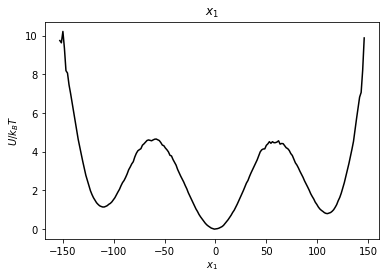

In [4]:
mm = multi_dim_gle(trunc = 10, bins = 200, kT =2.494, free_energy = 'ADD',physical = True,diagonal_mass = False,plot = True)
pos_arrays, fe_arrays = mm.compute_free_energy_landscape(xvaf)

#### Compute the correlation functions

dimension of system: 1
found dt = 0.002
calculate all correlation functions...
plot correlation matrices...


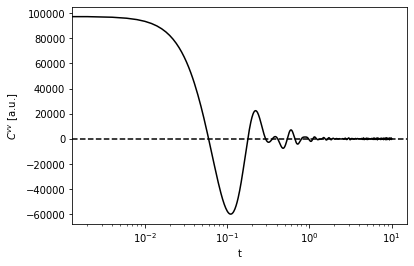

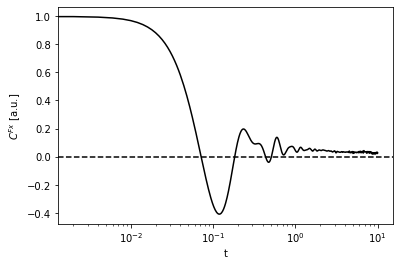

In [5]:
t_corr, v_corr_matrix,xU_corr_matrix,force_funcs = mm.compute_correlations_G(xvaf)

#### Extract the memory kernel

used kT
2.494
constant mass matrix:
[[2.56142016e-05]]
plot kernel entries...


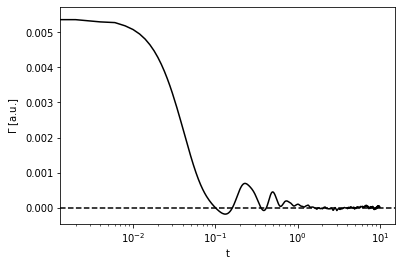

In [6]:
t_kernel, ikernel_matrix, kernel_matrix= mm.compute_kernel_mat_G(v_corr_matrix,xU_corr_matrix,
                                                                 first_kind = True, d  = 0,multiprocessing=1,half_stepped=False)

### Extract 2D Memory Kernel Matrix

Inspired by: https://www.pnas.org/doi/abs/10.1073/pnas.2023856118


#### Create dataframes for every trajectory


In [8]:
xvaf1=xvframe(theta,np.gradient(theta,dt),t,fix_time=True)
xvaf2=xvframe(phi,np.gradient(phi,dt),t,fix_time=True)
#create concatenated dataframe
xvaf = xvaf1.join(xvaf2, how='outer', lsuffix='_1', rsuffix='_2')
xvaf.head()

,t_1,x_1,v_1,t_2,x_2,v_2
#t,,,,,,
0.000,0.000,8.881,317.50,0.000,-6.174,413.5
0.002,0.002,9.516,316.50,0.002,-5.347,416.0
0.004,0.004,10.147,313.25,0.004,-4.510,421.0
0.006,0.006,10.769,308.50,0.006,-3.663,424.5
0.008,0.008,11.381,303.50,0.008,-2.812,426.5


/home/hendrykn123/.local/lib/python3.9/site-packages/multi_mems/multi_dim_gle.py:452: RuntimeWarning: divide by zero encountered in log
  fe=-np.log(hist) #in units of kT!


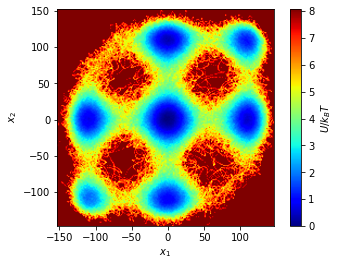

In [9]:
mm = multi_dim_gle(trunc = 10, bins = 200, kT =2.494, free_energy = 'MV',physical = True,diagonal_mass = False,plot=True)

pos_arrays, fe_arrays = mm.compute_free_energy_landscape(xvaf)

dimension of system: 2
found dt = 0.002
calculate all correlation functions...
calculate multi-variate free energy landscape
plot correlation matrices...


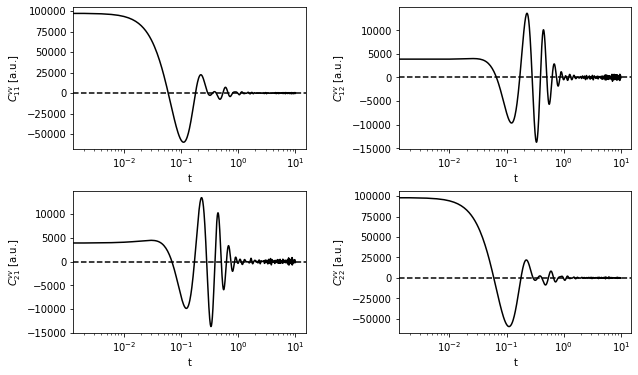

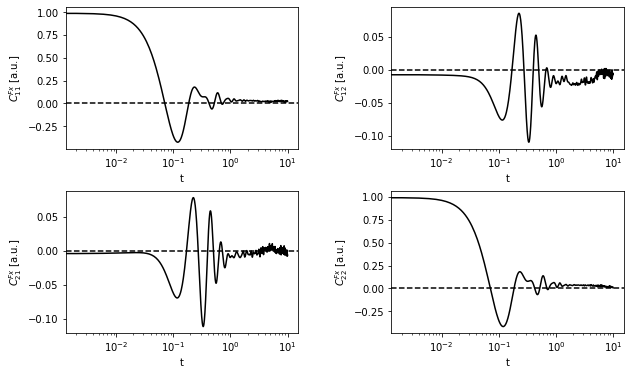

In [10]:
t_corr, v_corr_matrix,xU_corr_matrix,force_funcs = mm.compute_correlations_G(xvaf)

used kT
2.494
constant mass matrix:
[[ 2.56548258e-05 -1.01723953e-06]
 [-1.01723953e-06  2.54719129e-05]]
plot kernel entries...


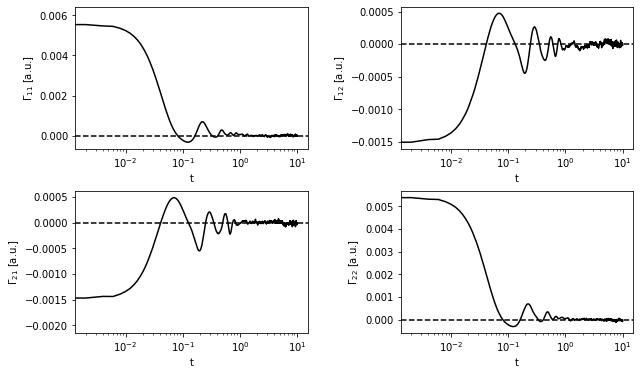

In [11]:
#you can use the multiprocessing argument to accelerate the extraction
t, ikernel_matrix, kernel_matrix= mm.compute_kernel_mat_G(v_corr_matrix,xU_corr_matrix,
                                                          first_kind = True, d  = 0,multiprocessing=5)

### Direct Method (numerical more demanding)

Inspired by: https://www.pnas.org/doi/abs/10.1073/pnas.1722327115


#### 1D

dimension of system: 1
found dt = 0.002
calculate all correlation functions...
plot correlation matrices...


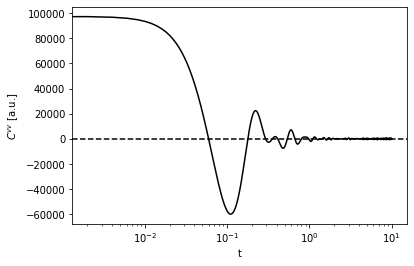

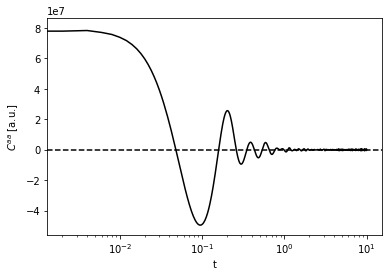

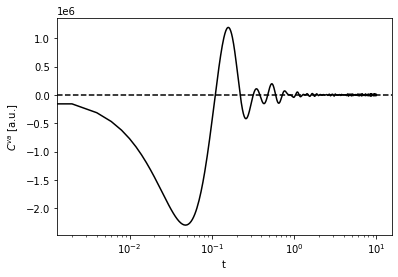

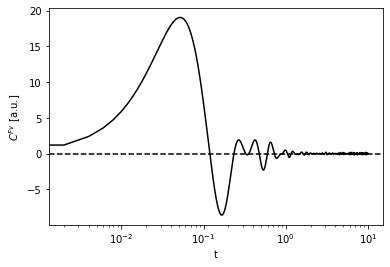

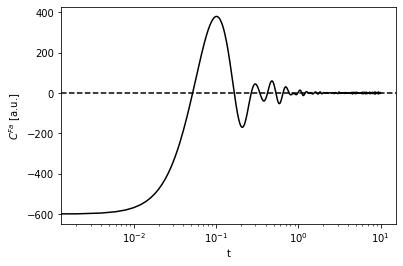

In [12]:
xf=xframe(theta,t,fix_time=True)
xvaf=compute_va(xf,correct_jumps=True)
xvaf.columns = ['t_1', 'x_1', 'v_1','a_1']
xvaf.head()

mm = multi_dim_gle(trunc = 10, bins = 200, kT =2.494, free_energy = 'ADD',physical = True,diagonal_mass = False,plot = True)
#pos_arrays, fe_arrays = mm.compute_free_energy_landscape(xvaf)
t_corr, v_corr_matrix, va_corr_matrix, a_corr_matrix,vU_corr_matrix,aU_corr_matrix,force_funcs = mm.compute_correlations_direct(xvaf)

used kT
2.494
constant mass matrix:
[[2.56142028e-05]]
initial memory matrix:
[[0.00576538]]
extract memory kernel entries...
plot kernel entries...


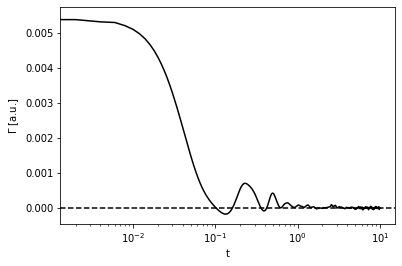

In [13]:
t, ikernel_matrix, kernel_matrix= mm.compute_kernel_mat_direct(v_corr_matrix, va_corr_matrix, a_corr_matrix,
                                                               vU_corr_matrix,aU_corr_matrix,
                                                          first_kind = True,multiprocessing=5)

#### 2D

In [14]:

xf1=xframe(theta,t,fix_time=True)
xvaf1=compute_va(xf1,correct_jumps=True)

xf2=xframe(phi,t,fix_time=True)
xvaf2=compute_va(xf2,correct_jumps=True)

#create concatenated dataframe
xvaf = xvaf1.join(xvaf2, how='outer', lsuffix='_1', rsuffix='_2')
xvaf.head()

,t_1,x_1,v_1,a_1,t_2,x_2,v_2,a_2
#t,,,,,,,,
0.002,0.002,9.516,316.50,-1000.0,0.002,-5.347,416.00,2500.0
0.004,0.004,10.147,313.25,-2250.0,0.004,-4.510,421.00,2500.0
0.006,0.006,10.769,308.50,-2500.0,0.006,-3.663,424.50,1000.0
0.008,0.008,11.381,303.50,-2500.0,0.008,-2.812,426.50,1000.0
0.010,0.010,11.983,297.50,-3500.0,0.010,-1.957,427.75,250.0


dimension of system: 2
found dt = 0.002
calculate all correlation functions...
calculate multi-variate free energy landscape


/home/hendrykn123/.local/lib/python3.9/site-packages/multi_mems/multi_dim_gle.py:452: RuntimeWarning: divide by zero encountered in log
  fe=-np.log(hist) #in units of kT!


plot correlation matrices...


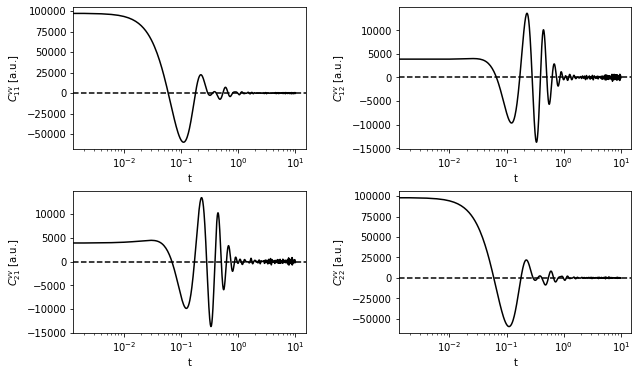

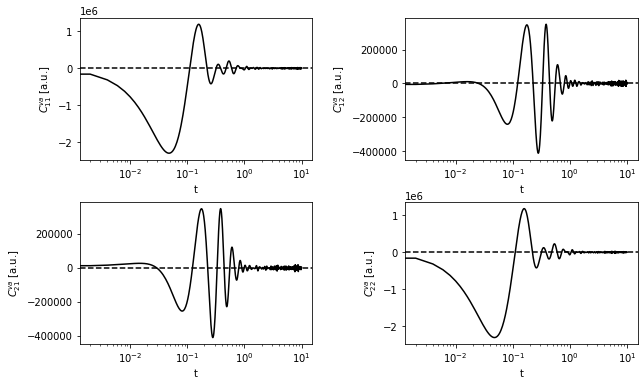

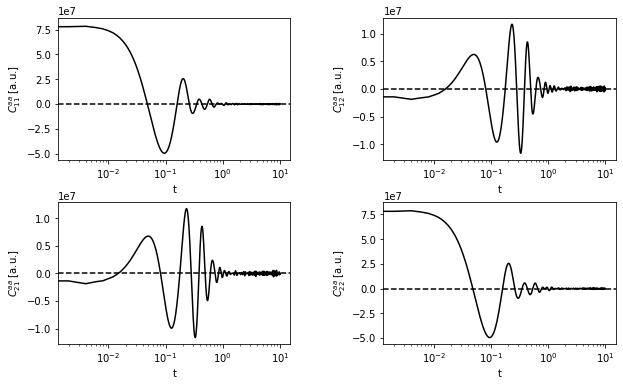

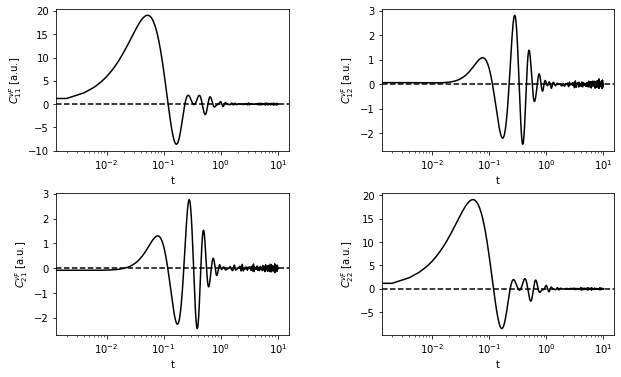

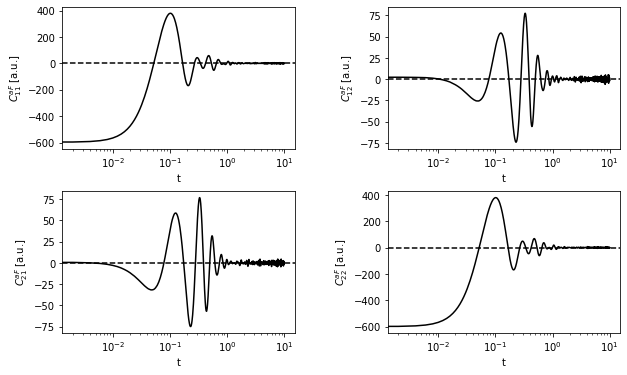

In [15]:
mm = multi_dim_gle(trunc = 10, bins = 200, kT =2.494, free_energy = 'MV',physical = True,diagonal_mass = False,plot=True)
t_corr, v_corr_matrix, va_corr_matrix, a_corr_matrix,vU_corr_matrix,aU_corr_matrix,force_funcs = mm.compute_correlations_direct(xvaf)

used kT
2.494
constant mass matrix:
[[ 2.56548257e-05 -1.01722356e-06]
 [-1.01722356e-06  2.54719272e-05]]
initial memory matrix:
[[ 0.0059588  -0.00172332]
 [-0.001752    0.00584492]]
extract memory kernel entries...
plot kernel entries...


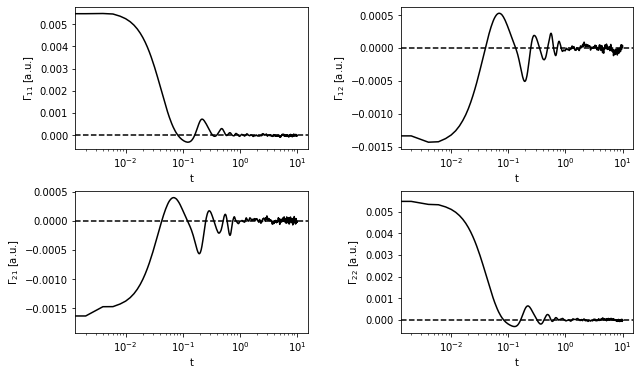

In [16]:
#you can use the multiprocessing argument to accelerate the extraction
t, ikernel_matrix, kernel_matrix= mm.compute_kernel_mat_direct(v_corr_matrix, va_corr_matrix, a_corr_matrix,
                                                               vU_corr_matrix,aU_corr_matrix,
                                                          first_kind = True,multiprocessing=5)

### The extraction can be expanded to higher dimension! Just provide the needed dataframe.
Example where the third coordinate is just a random variable

In [17]:
xvaf1=xvframe(theta,np.gradient(theta,dt),t,fix_time=True)
xvaf2=xvframe(phi,np.gradient(phi,dt),t,fix_time=True)
xvaf3=xvframe(np.random.normal(0,1,len(theta)),np.gradient(np.random.normal(0,1,len(theta)),dt),t,fix_time=True)

#create concatenated dataframe
xvaf = xvaf1.join(xvaf2, how='outer', lsuffix='_1', rsuffix='_2')
xvaf3.columns = ['t_3', 'x_3', 'v_3']

xvaf = xvaf.join(xvaf3, how='outer')

xvaf.head()

,t_1,x_1,v_1,t_2,x_2,v_2,t_3,x_3,v_3
#t,,,,,,,,,
0.000,0.000,8.881,317.50,0.000,-6.174,413.5,0.000,-0.825293,-578.224477
0.002,0.002,9.516,316.50,0.002,-5.347,416.0,0.002,-0.689281,-137.258839
0.004,0.004,10.147,313.25,0.004,-4.510,421.0,0.004,-0.206962,-199.996595
0.006,0.006,10.769,308.50,0.006,-3.663,424.5,0.006,1.166583,106.456588
0.008,0.008,11.381,303.50,0.008,-2.812,426.5,0.008,-0.982327,29.944014


dimension of system: 3
found dt = 0.002
calculate all correlation functions...
calculate multi-variate free energy landscape


/home/hendrykn123/.local/lib/python3.9/site-packages/multi_mems/multi_dim_gle.py:452: RuntimeWarning: divide by zero encountered in log
  fe=-np.log(hist) #in units of kT!


plot correlation matrices...


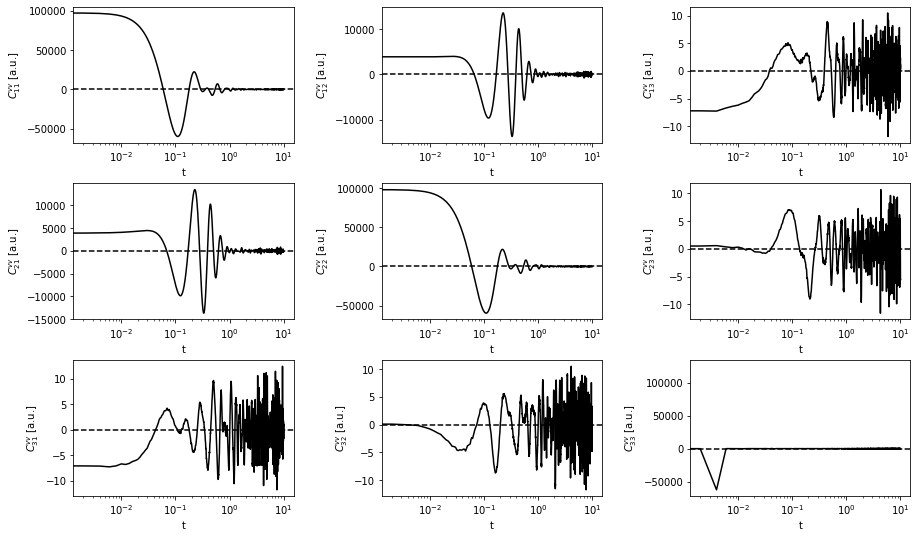

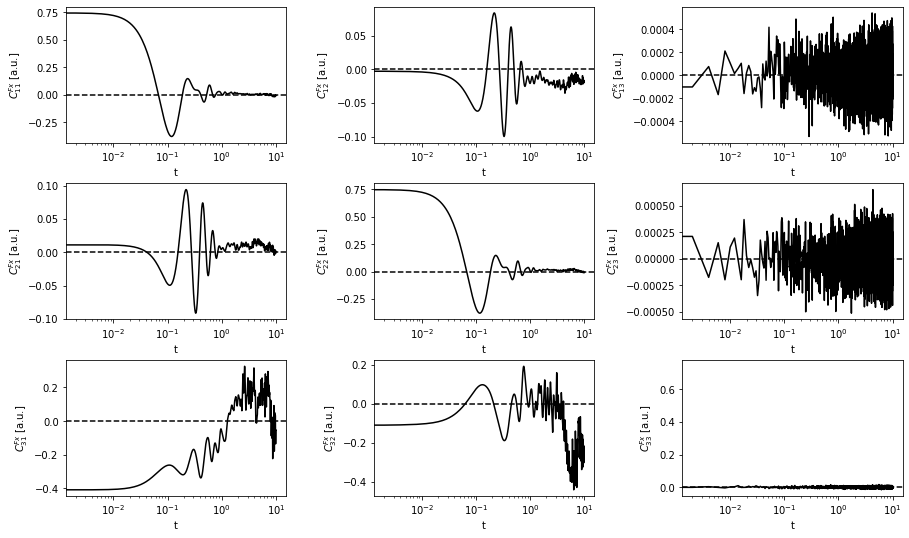

In [18]:
mm = multi_dim_gle(trunc = 10, bins = 200, kT =2.494, free_energy = 'MV',physical = True,diagonal_mass = False,plot=True)
t_corr, v_corr_matrix,xU_corr_matrix,force_funcs = mm.compute_correlations_G(xvaf)

used kT
2.494
constant mass matrix:
[[ 2.56548259e-05 -1.01723954e-06  1.43578249e-09]
 [-1.01723954e-06  2.54719129e-05 -1.04279106e-10]
 [ 1.43578249e-09 -1.04279106e-10  1.99726263e-05]]
plot kernel entries...


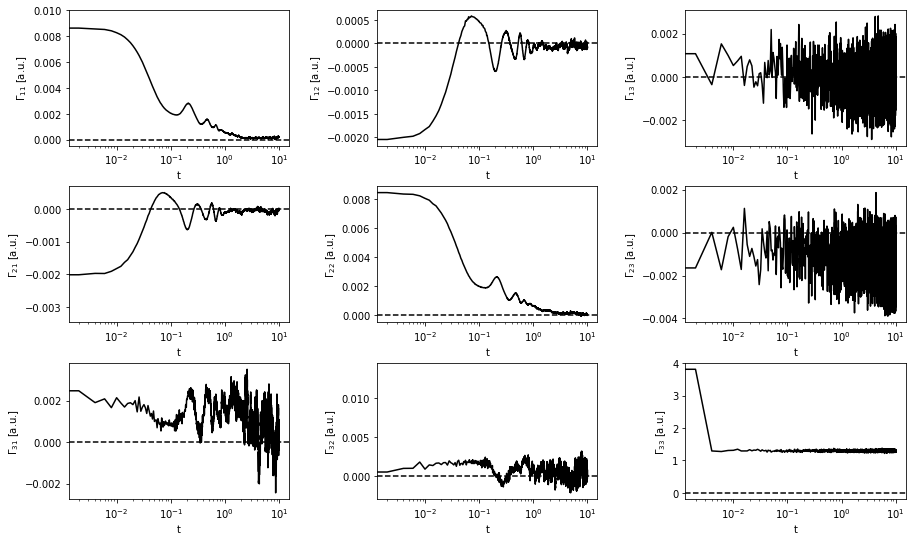

In [19]:
#you can use the multiprocessing argument to accelerate the extraction
t, ikernel_matrix, kernel_matrix= mm.compute_kernel_mat_G(v_corr_matrix,xU_corr_matrix,
                                                          first_kind = True, d  = 0,multiprocessing=5)